In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [3]:
def latest_version(cat):
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal_subset','source_id','table_id',
                                               'institution_id','variable_id','member_id',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat

In [4]:
#col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/master/esm-collection-spec-examples/esgf-world.json"
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [5]:
model_name = 'IPSL-CM6A-LR'

In [6]:
#mlotst, tos,uo,vo

In [7]:
def chunk_time(ds):
    if 'time' in ds.dims:
        ds = ds.chunk({'time':1})
    return ds

In [8]:
# Necessary for creating a common time axis for all models
# We want to create a common time axis so there will be no gaps when plotting the results 

def fix_time(ds):
    """ force calendar to noleap"""
    import xarray as xr
    
    if "time" not in ds.dims:
        return ds
    
    if ("calendar" not in ds["time"].attrs): 
        ds["time"].attrs.update({"calendar": "noleap"})
        
    if ds["time"].attrs["calendar"] not in ["noleap", "NOLEAP", "365_day"]:
        ds["time"].attrs.update({"calendar": "noleap"})
        
    ds = xr.decode_cf(ds)
    return ds

In [9]:
def pp_enso(ds):
    ds = ds.copy()   #the wrapper function makes a copy of the ds and works from this
    #ds = rename_cmip6(ds)
    ds = fix_time(ds)
    #ds = fix_units(ds)
    #ds = correct_units(ds)
    return ds

In [10]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [11]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Omon'],
                 member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["tos"])
query_Ofx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 table_id=['Ofx'],
               member_id=["r1i1p1f1","r1i1p1f2"],
                 source_id=model_name,
                 grid_label=['gn'],
                 variable_id=["areacello"])

In [12]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [13]:
cat_Omon_tos_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,IPSL,IPSL-CM6A-LR,1pctCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-199912,v20180727,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/1...
7,CMIP6,IPSL,IPSL-CM6A-LR,historical,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-201412,v20180803,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/h...
4,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,185001-214912,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...
5,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,215001-244912,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...
6,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,mon,ocean,Omon,r1i1p1f1,gn,tos,245001-274912,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...


In [14]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [15]:
cat_Ofx_latest.df

,project,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,version,path
0,CMIP6,IPSL,IPSL-CM6A-LR,1pctCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20180727,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/1...
4,CMIP6,IPSL,IPSL-CM6A-LR,historical,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20180803,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/h...
3,CMIP6,IPSL,IPSL-CM6A-LR,abrupt-4xCO2,NaN,NaN,Ofx,r1i1p1f1,gn,areacello,NaN,v20190118,s3://esgf-world/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/a...


In [34]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': False,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [17]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institution_id.source_id.experiment_id.table_id'


In [18]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.IPSL.IPSL-CM6A-LR.1pctCO2.Omon', 'CMIP6.IPSL.IPSL-CM6A-LR.historical.Omon', 'CMIP6.IPSL.IPSL-CM6A-LR.abrupt-4xCO2.Omon'])

In [19]:
dict_Ofx.keys()

dict_keys(['CMIP6.IPSL.IPSL-CM6A-LR.1pctCO2.Ofx', 'CMIP6.IPSL.IPSL-CM6A-LR.historical.Ofx', 'CMIP6.IPSL.IPSL-CM6A-LR.abrupt-4xCO2.Ofx'])

In [20]:
ds_Ofx = dict_Ofx["CMIP6.IPSL.IPSL-CM6A-LR.historical.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

In [21]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = np.pi / 180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    # theta = longitude
    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians
    # Compute spherical distance from spherical coordinates.
    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) =
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
    cos = np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(
        phi2
    )
    arc = np.arccos(cos)
    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc

In [22]:
def find_closest_grid_point(lon, lat, gridlon, gridlat):
    """find integer indices of closest grid point in grid of coordinates
    gridlon, gridlat for a given geographical lon/lat.
    PARAMETERS:
    -----------
        lon (float): longitude of point to find
        lat (float): latitude of point to find
        gridlon (numpy.ndarray): grid longitudes
        gridlat (numpy.ndarray): grid latitudes
    RETURNS:
    --------
    iclose, jclose: integer
        grid indices for geographical point of interest
    """

    if isinstance(gridlon, xr.core.dataarray.DataArray):
        gridlon = gridlon.values
    if isinstance(gridlat, xr.core.dataarray.DataArray):
        gridlat = gridlat.values
    dist = distance_on_unit_sphere(lat, lon, gridlat, gridlon)
    jclose, iclose = np.unravel_index(dist.argmin(), gridlon.shape)
    return iclose, jclose


In [23]:
i,j= find_closest_grid_point(-157, -5, ds_Ofx.nav_lon, ds_Ofx.nav_lat)#for southwest
i,j

(130, 171)

In [24]:
k,l = find_closest_grid_point(-90, 5, ds_Ofx.nav_lon, ds_Ofx.nav_lat)#for northwest
k,l

(197, 201)

CALCULATING the summation of areacello

In [25]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(y = slice(j,l), x = slice(i,k))

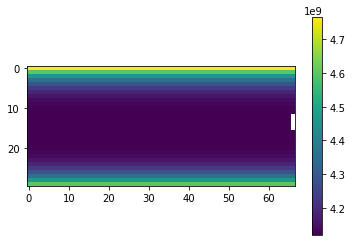

In [26]:
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [27]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('x', 'y'))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

In [67]:
ds_hist.info()

xarray.Dataset {
dimensions:
	axis_nbounds = 2 ;
	member_id = 1 ;
	nvertex = 4 ;
	time = 1980 ;
	x = 362 ;
	y = 332 ;

variables:
	float32 nav_lat(y, x) ;
		nav_lat:standard_name = latitude ;
		nav_lat:long_name = Latitude ;
		nav_lat:units = degrees_north ;
		nav_lat:bounds = bounds_nav_lat ;
	float32 nav_lon(y, x) ;
		nav_lon:standard_name = longitude ;
		nav_lon:long_name = Longitude ;
		nav_lon:units = degrees_east ;
		nav_lon:bounds = bounds_nav_lon ;
	float32 bounds_nav_lon(y, x, nvertex) ;
	float32 bounds_nav_lat(y, x, nvertex) ;
	float32 area(y, x) ;
		area:standard_name = cell_area ;
		area:units = m2 ;
	float64 time(time) ;
		time:axis = T ;
		time:standard_name = time ;
		time:long_name = Time axis ;
		time:calendar = gregorian ;
		time:units = days since 1850-01-01 00:00:00 ;
		time:time_origin = 1850-01-01 00:00:00 ;
		time:bounds = time_bounds ;
	float64 time_bounds(time, axis_nbounds) ;
	float32 tos(member_id, time, y, x) ;
		tos:standard_name = sea_surface_temperature ;

In [64]:
ds_Ofx.dims

Frozen(SortedKeysDict({'y': 332, 'x': 362, 'nvertex': 4, 'member_id': 1}))

## Historical

In [61]:
ds_hist = dict_Omon_tos["CMIP6.IPSL.IPSL-CM6A-LR.historical.Omon"]


In [26]:
ds_hist.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 11, 25, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 26, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 25, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2015-01-25 12:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1850-01-01 00:00:00
    bounds:         time_bounds

In [32]:
tm_his_st, tm_his_nd = '1980','2011'


In [33]:
tos_his =ds_hist.tos.sel(time = slice(tm_his_st, tm_his_nd))

In [35]:
tos_his = ds_hist.tos.sel(y = slice(j,l), x = slice(i,k), time = slice(tm_his_st, tm_his_nd))
tos_his

<xarray.DataArray 'tos' (member_id: 1, time: 384, y: 30, x: 67)>
dask.array<getitem, shape=(1, 384, 30, 67), dtype=float32, chunksize=(1, 1, 30, 67), chunktype=numpy.ndarray>
Coordinates:
    nav_lat    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
    nav_lon    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
  * time       (time) object 1980-01-16 12:00:00 ... 2011-12-25 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    units:               degC
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    cell_measures:       area: areacello
    description:         This may differ from "surface temperature" in region...
    history:             none

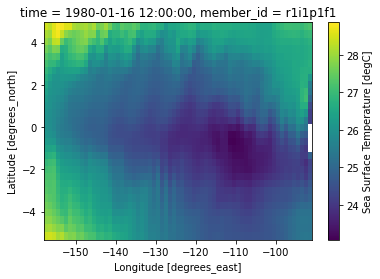

In [39]:
tos_his.isel(time=0).plot(x ="nav_lon", y = "nav_lat")


CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [44]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [45]:
tos_mean_nino3_his = tos_mean_nino3_his.compute()

In [46]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [47]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([25.320503], dtype=float32)
Coordinates:
    time       object 1980-01-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [48]:
datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
tos_mean_nino3_his['time'] = datetimeindex


<ipython-input-48-e7b25880c2d7>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()


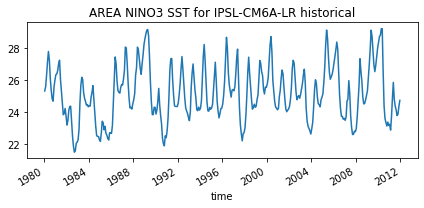

In [49]:
tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_SST_Hist_{tm_his_st}_{tm_his_nd}.png")

ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [51]:
tos_nino3_climatology = tos_mean_nino3_his.sel(time=slice("1980", "2011")).groupby('time.month').mean(dim='time')


In [52]:
tos_nino3_climatology = tos_nino3_climatology.compute()

In [56]:
#tos_nino3_climatology.isel(day=0).plot()
print(tos_nino3_climatology)

<xarray.DataArray (member_id: 1, month: 12)>
array([[24.492176, 24.92034 , 25.734102, 26.588705, 27.176823, 26.40712 ,
        25.326149, 24.581572, 24.092812, 24.060024, 24.321163, 24.35654 ]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


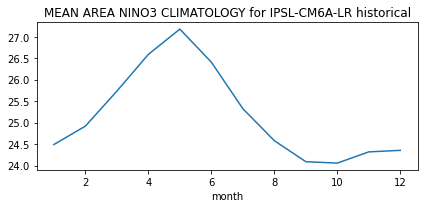

In [58]:
#tos_nino3_climatology.isel(month=0).plot()
tos_nino3_climatology.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Clima_Hist_{tm_his_st}_{tm_his_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [59]:
#tos_sel = tos_his.sel(time=slice('1980','2011'))
index_nino3 = (tos_his.groupby('time.month')-tos_nino3_climatology).mean(dim=['x','y'])

In [60]:
index_nino3 = index_nino3.compute()

In [ ]:
datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex


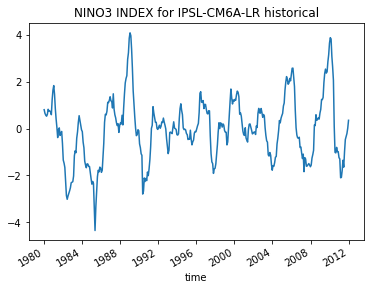

In [62]:
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} historical")
plt.savefig(f"{model_name}_Nino3Idx_Hist_{tm_his_st}_{tm_his_nd}.png")

In [65]:
1999-31

1968

## 1%CO2

In [63]:
ds_1pct = dict_Omon_tos["CMIP6.IPSL.IPSL-CM6A-LR.1pctCO2.Omon"]

In [64]:
ds_1pct.time.to_dataframe()

,time
time,
1850-01-16 12:00:00,1850-01-16 12:00:00
1850-02-15 00:00:00,1850-02-15 00:00:00
1850-03-16 12:00:00,1850-03-16 12:00:00
1850-04-16 00:00:00,1850-04-16 00:00:00
1850-05-16 12:00:00,1850-05-16 12:00:00
...,...
1999-09-21 12:00:00,1999-09-21 12:00:00
1999-10-22 00:00:00,1999-10-22 00:00:00
1999-11-21 12:00:00,1999-11-21 12:00:00


In [66]:
tm_1pct_st, tm_1pct_nd = "1968", "1999"

In [20]:
#tos_1pct = ds_1pct.tos#.sel(time = slice("1980", "2011"))

In [73]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(y = slice(j,l), x = slice(i,k), time = slice(tm_1pct_st, tm_1pct_nd))
tos_1pct

<xarray.DataArray 'tos' (member_id: 1, time: 384, y: 30, x: 67)>
dask.array<getitem, shape=(1, 384, 30, 67), dtype=float32, chunksize=(1, 1, 30, 67), chunktype=numpy.ndarray>
Coordinates:
    nav_lat    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
    nav_lon    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
  * time       (time) object 1968-01-13 12:00:00 ... 1999-12-22 00:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    units:               degC
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    cell_measures:       area: areacello
    description:         This may differ from "surface temperature" in region...
    history:             none

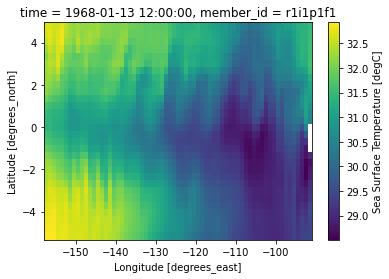

In [74]:
tos_1pct.isel(time=0).plot(x ="nav_lon", y = "nav_lat")

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [76]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [77]:
tos_mean_nino3_1pct = tos_mean_nino3_1pct.compute()

In [78]:
tos_mean_nino3_1pct.size

384

In [79]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (member_id: 1)>
array([30.682787], dtype=float32)
Coordinates:
    time       object 1968-01-13 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'

In [82]:
datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

<ipython-input-82-3e144c86bf9d>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()


In [83]:
tos_mean_nino3_1pct['time'] = datetimeindex_1pct

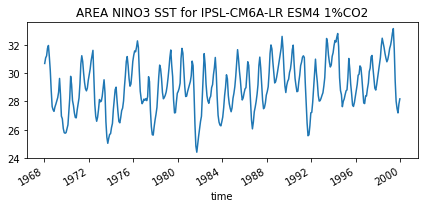

In [84]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCo2_SST_{tm_1pct_st}_{tm_1pct_nd}.png")

In [85]:
tos_nino3_climatology_1pct = tos_mean_nino3_1pct.groupby('time.month').mean(dim='time')


In [86]:
tos_nino3_climatology_1pct = tos_nino3_climatology_1pct.compute()

In [87]:
#tos_nino3_climatology_1pct.isel(month=0).plot()
print (tos_nino3_climatology_1pct)

<xarray.DataArray (member_id: 1, month: 12)>
array([[28.77465 , 29.138699, 29.732708, 30.494968, 31.181437, 30.455212,
        29.205173, 28.256847, 27.679295, 27.636868, 27.98909 , 28.373432]],
      dtype=float32)
Coordinates:
  * member_id  (member_id) <U8 'r1i1p1f1'
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


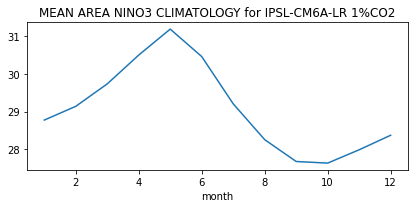

In [88]:
tos_nino3_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [89]:
#tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3 = (tos_1pct.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['x','y'])

In [90]:
index_nino3 = index_nino3.compute()

In [91]:
datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
index_nino3['time'] = datetimeindex

<ipython-input-91-fd6f698798bf>:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = index_nino3.indexes['time'].to_datetimeindex()


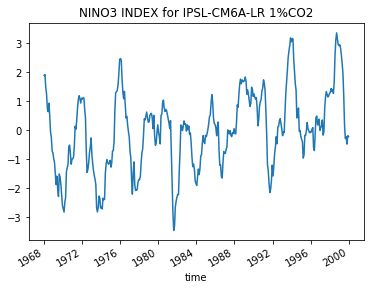

In [92]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} 1%CO2")
plt.savefig(f"{model_name}_1pctCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

## Abrupt-4xCO2

In [35]:
ds_4x = dict_Omon_tos["CMIP6.IPSL.IPSL-CM6A-LR.abrupt-4xCO2.Omon"]

In [41]:
ds_4x = fix_time(ds_4x)

In [42]:
print (ds_4x.time)

<xarray.DataArray 'time' (time: 10800)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2149, 12, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2150, 1, 27, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2150, 2, 26, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2150-02-26 12:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1850-01-01 00:00:00
    bounds:         time_bounds


In [43]:
tm_4x_st,tm_4x_nd = "1968", "1999"

In [45]:
tos_4x = ds_4x.tos.sel(time = slice("1968", "1999"))

KeyError: cftime.DatetimeNoLeap(1968, 1, 1, 0, 0, 0, 0, has_year_zero=True)

In [50]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(y = slice(j,l), x= slice(i,k) )
tos_4x

<xarray.DataArray 'tos' (member_id: 1, time: 10800, y: 30, x: 67)>
dask.array<getitem, shape=(1, 10800, 30, 67), dtype=float32, chunksize=(1, 1, 30, 67), chunktype=numpy.ndarray>
Coordinates:
    nav_lat    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
    nav_lon    (y, x) float32 dask.array<chunksize=(30, 67), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2150-02-26 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    units:               degC
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  2700 s
    interval_write:      1 month
    cell_measures:       area: areacello
    description:         This may differ from "surface temperature" in region...
    history:             none

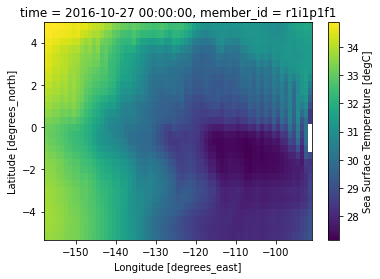

In [59]:
tos_4x.isel(time=2000).plot(x = "nav_lon",y = "nav_lat")

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [54]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [55]:
tos_mean_nino3_4x.compute()

<xarray.DataArray (ensemble_member: 1, time: 1800)>
array([[25.639414, 26.249512, 26.237864, ..., 26.837673, 27.146858,
        28.272776]], dtype=float32)
Coordinates:
  * time             (time) object 0001-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [56]:
tos_mean_nino3_4x.size #1980 values, 1 value per month , 12 per year for 165 years

1800

In [57]:
tos_mean_nino3_4x.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([25.639414], dtype=float32)
Coordinates:
    time             object 0001-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [ ]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


In [ ]:
tos_mean_nino3_4x.sel(time=slice('0119','0150')).plot(aspect=2, size=3)
plt.title("NINO3 index for ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()

In [ ]:
tos_nino3_climatology_4x = tos_4x.sel(time=slice('0119','0150')).groupby('time.month').mean(dim='time')


In [ ]:
tos_nino3_climatology_4x.compute()

In [ ]:
tos_nino3_climatology_4x.isel(month=0).plot()

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [46]:
tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_sel_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['x','y'])

In [ ]:
index_nino3_4x.compute()

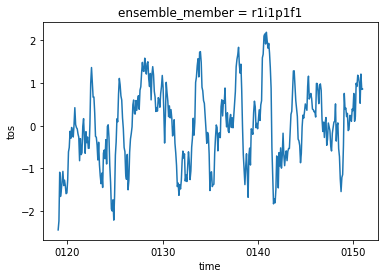

In [48]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3_4x.plot()